# Communicate Data Finding
Ford GoBike System Data

## by Rinad Bankher

## Investigation Overview

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. In the first part, you will use Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables. In the second part, you will produce a short presentation that illustrates interesting properties, trends, and relationships that you discovered in your selected dataset. The primary method of conveying your findings will be through transforming your exploratory visualizations from the first part into polished, explanatory visualizations.

## Dataset Overview

Ford GoBike is a regional public bicycle sharing system located in San Francisco Bay Area. This dataset shows history data of individual rides made in a bike-sharing system at 2019. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Ford_GoBike_cleaned.csv')

### What is the structure of your dataset?

> The cleaned dataset has 171617 rows and 2 columns (user_type and member_gender) with 3 additional columns by feature engineering (member_age, hours, and weekdays).

### What is/are the main feature(s) of interest in your dataset?
>   - Age
>   - Gender
>   - Membership Status
>   - Weekday
>   - Hour

## Q1. What is the relation between users age and their gender?

> The male and female median ages are close to each other, whereas the other gender is slightly higher. We can see that females in nearly 30s tend to ride bikes than all different genders. Another thing to notice is the other gender has more users at age 50s.


In [3]:
gender = ['Male', 'Female', 'Other']

# Returns the types for member_gender with the categories and orderedness
gender_classes = pd.api.types.CategoricalDtype(ordered=True, categories=gender)

# Convert the "gender_classes" column from a plain object type into an ordered categorical type 
df['member_gender'] = df['member_gender'].astype(gender_classes);

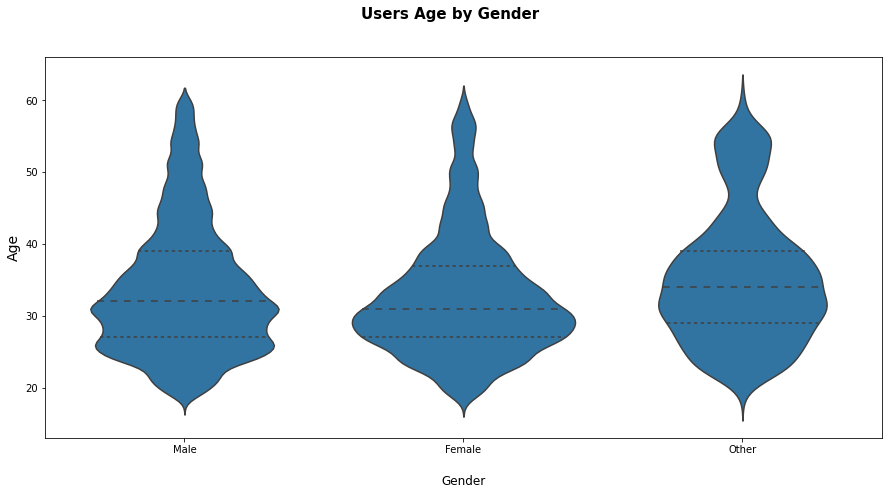

In [4]:
# Set figure size
fig = plt.figure(figsize = [15,7])

# Plot bars color
plot_color = sb.color_palette()[0]

# Plot violin plot 
# categorical vs numerical
sb.violinplot(data=df, x='member_gender', y='member_age', color=plot_color, inner = 'quartile')

# Set title and axis labels 
plt.xlabel('Gender', fontsize=12,labelpad = 20)
plt.ylabel('Age', fontsize=14)
fig.suptitle('Users Age by Gender', fontsize=15, fontweight = 'bold');

## Q2. Does the number of users gender differ between users type?

> The result shows that the range of the y-axis of subscriber user type is higher than the customer. Also, for each user type, most users were male.

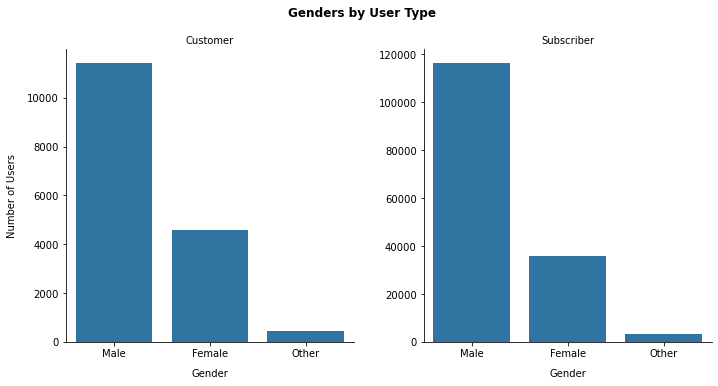

In [22]:
# Plot the seaborn's FacetGrid
# categorical vs categorical
plot_1 = sb.FacetGrid(data = df, col = 'user_type', sharey = False, height = 4, size = 5)
plot_1.map(sb.countplot, 'member_gender', order = gender)

# Set plot labels and title
plot_1.set_axis_labels('Gender','Number of Users', labelpad = 10)
plot_1.set_titles("{col_name}")
plot_1.fig.suptitle('Genders by User Type', y= 1.05, fontweight='bold');

## Q3. Does users age distribution differ between users type?

> The distributions show the Majority of users fall between 28 to 33 years old for both user types.

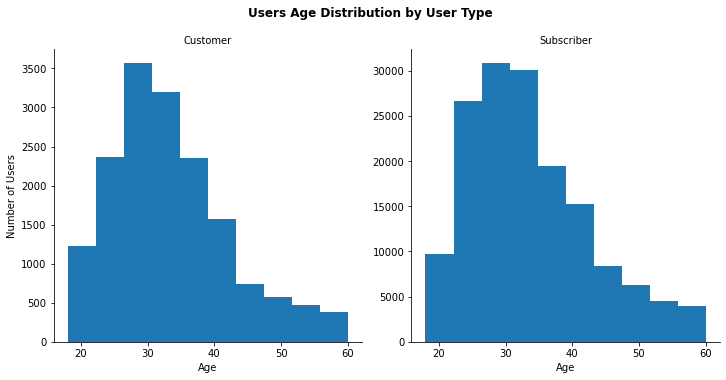

In [23]:
# Plot FacetGrid
# categorical Vs numerical
plot_2 = sb.FacetGrid(data = df, col = 'user_type', sharey=False, height= 4, size = 5)
plot_2.map(plt.hist, 'member_age')

# Set title and axis labels  
plot_2.set_axis_labels('Age', 'Number of Users')
plot_2.set_titles("{col_name}")
plot_2.fig.suptitle('Users Age Distribution by User Type', y=1.05, fontweight='bold');


## Q4. What is the weekly usage for each user type?
> The two distributions show weekdays have high number of rides than weekends. But, compared with subscribers, customers are more likely to ride bikes on weekends.



In [7]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Returns the days for weekday with the categories and orderedness
weekday_classes = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)

# Convert the "weekday_classes" column from a plain object type into an ordered categorical type 
df['weekdays'] = df['weekdays'].astype(weekday_classes);

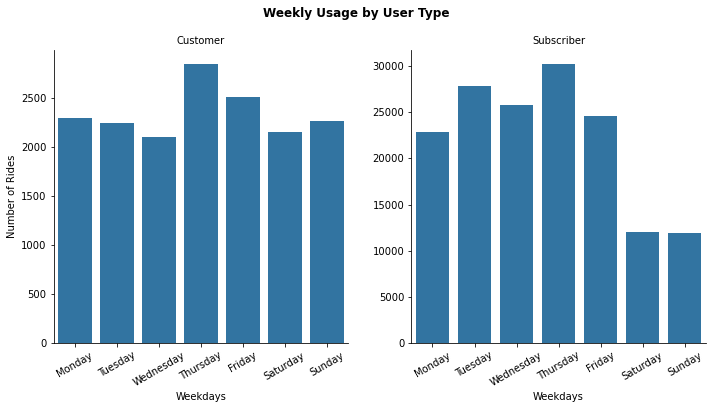

In [24]:
# Plot FacetGrid
# categorical vs numerical
plot_3 = sb.FacetGrid(data = df, col = 'user_type', sharey = False, height =5, size = 5)
plot_3.map(sb.countplot, 'weekdays', order = weekday)

# Set title and axis labels 
plot_3.set_titles("{col_name}")
plot_3.fig.suptitle('Weekly Usage by User Type', y= 1.05, fontweight='bold')
plot_3.set_axis_labels('Weekdays', 'Number of Rides')
plot_3.set_xticklabels(rotation=30);

## Q5. Would hourly usage be the same for the different users type?
> It seems like customers ride bikes often between 5-6 PM, while subscribers ride bikes during rush hours (8-9 AM and 5-6 PM).

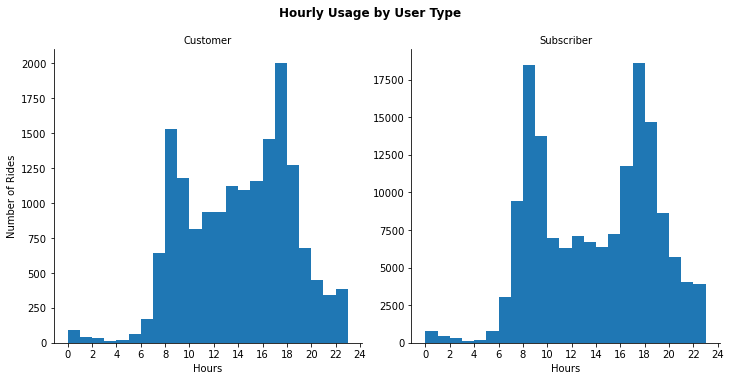

In [25]:
# Create x-axis ticks with step-size 2
tick = np.arange(0,df.hours.max()+2,2)
# Create bins with step-size 1
bins = np.arange(0,df.hours.max()+1,1)

# Plot FacetGrid
# categorical vs numerical
plot_4 = sb.FacetGrid(data = df, col = 'user_type', sharey=False, height = 4, size = 5)
plot_4.map(plt.hist, 'hours', bins = bins);

# Change x-axis ticks
plt.xticks(tick)

# Set title and axis labels 
plot_4.set_axis_labels('Hours', 'Number of Rides')
plot_4.set_titles("{col_name}")
plot_4.fig.suptitle('Hourly Usage by User Type', y=1.05, fontweight='bold');

## Q6. What is the weekly bike usage by users type and genders?
> The plot supports the previous bivariate plots. For both user types, Most users were Male. The weekdays have high number of rides for both user types.


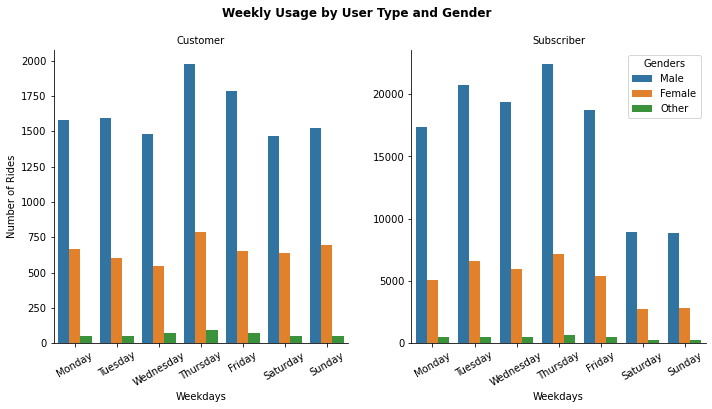

In [20]:
# Plot catplot
# Chose this plot for its flexibility 
# dealing with multi categorical data
plot_5 = sb.catplot(data=df, x='weekdays', col='user_type', hue='member_gender', 
                kind='count', sharey=False, legend=False)

# Set title and axis labels 
plot_5.fig.suptitle('Weekly Usage by User Type and Gender', y= 1.05, fontweight='bold')
plot_5.set_titles("{col_name}")
plot_5.set_axis_labels('Weekdays', 'Number of Rides')
plot_5.set_xticklabels(rotation=30)
plt.legend(title='Genders', loc='upper right');

## Q7. What is the Hourly usage by users type and genders?
> Also, This plot supports the previous bivariate plots. Customers users ride bikes often between 5-6 PM, while subscribers ride bikes during rush hours (8-9 AM and 5-6 PM).


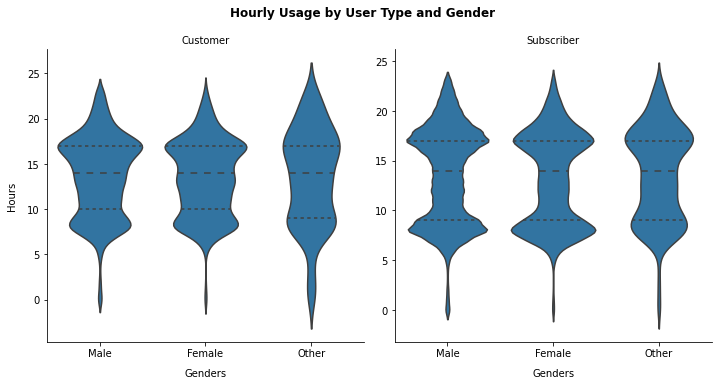

In [26]:
# Plot FacetGrid
plot_6 = sb.FacetGrid(data = df, col = 'user_type', sharey = False, height =5, size = 5)
plot_6.map(sb.violinplot,'member_gender','hours', order= gender,
          inner = 'quartile')

# Set title and axis labels 
plot_6.set_axis_labels('Genders', 'Hours', labelpad = 10)
plot_6.set_titles("{col_name}")
plot_6.fig.suptitle('Hourly Usage by User Type and Gender', y=1.05, fontweight='bold');

## Q8. How is the bike usage distributed on hours and weekdays for customers and subscribers?
> The plot also shows patterns as the two previous plots.


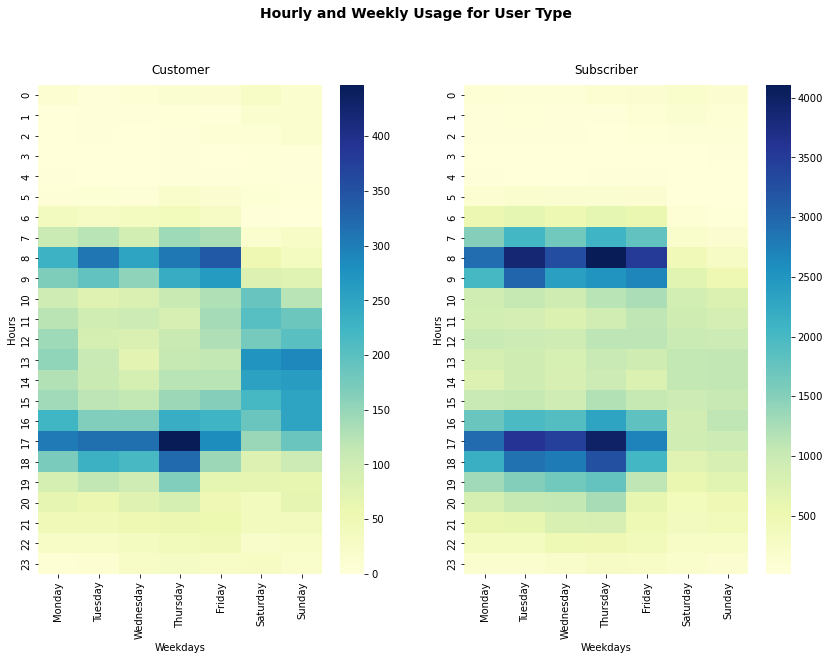

In [16]:
fig = plt.figure(figsize = [14,9])

# Add title for figure
fig.suptitle('Hourly and Weekly Usage for User Type', y=1.00, fontsize = 14, fontweight='bold');

# plot heatmap for customer users
plt.subplot(1, 2, 1)
# Get the number of customer users for each hour and weekday as a pandas series
c_type = df.query('user_type == "Customer"').groupby(["hours", "weekdays"]).size()
# Convert a series into a dataframe object
c_type = c_type.reset_index(name='count')
# Rearrange the data, to have hours on rows
c_type = c_type.pivot(index = 'hours', columns = 'weekdays', values = 'count')
# Plot heatmap with color templete
sb.heatmap(c_type, cmap='YlGnBu')

# Set plot title and axis labels 
plt.title('Customer', y=1.01)
plt.xlabel('Weekdays')
plt.ylabel('Hours');


# plot heatmap for subscriber users
plt.subplot(1, 2, 2)
# Get the number of subscriber users for each hour and weekday as a pandas series
s_type = df.query('user_type == "Subscriber"').groupby(["hours", "weekdays"]).size()
# Convert a series into a dataframe object
s_type = s_type.reset_index(name='count')
# Rearrange the data, to have hours on rows
s_type = s_type.pivot(index = 'hours', columns = 'weekdays', values = 'count')
# Plot heatmap with color templete
sb.heatmap(s_type,  cmap= 'YlGnBu')

# Set plot title and axis labels 
plt.title('Subscriber', y=1.01)
plt.xlabel('Weekdays')
plt.ylabel('Hours');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploring section did support and prove the founding in the bivariate section. I also notice customers are more likely to ride bikes on weekends, which consider a chance for the company to increase its customer users. I found this point is interesting as I think customer users ride the bike other than for work, unlike subscribe users.
